# Class 6 (Monday 21 November)

These tasks are designed to be worked on in the practical class on Monday 21 November.

In [2]:
import numpy as np
from numpy.random import RandomState
from scipy.sparse.linalg import cg
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import cm
import seaborn as sns
plt.style.use('seaborn-notebook')

## Using CG
You can create a random 500 by 500 symmetric positive definite matrix by running:

In [8]:
n = 500

rand = RandomState(0)
Q, _ = np.linalg.qr(rand.randn(n, n))
D = np.diag(rand.rand(n))
A = Q.T @ D @ Q
b = rand.randn(n)

Solve $\mathrm{A}\mathbf{x}=\mathrm{b}$ for a random vector $\mathbf{b}$ using CG (`scipy.sparse.linalg.cg`).
Make a plot showing the number of iterations vs the size of the residual.

In [27]:
iters = np.linspace(1,100,100)
res = []

for i in iters:
    res.append(cg(A, b, maxiter = i)[1])

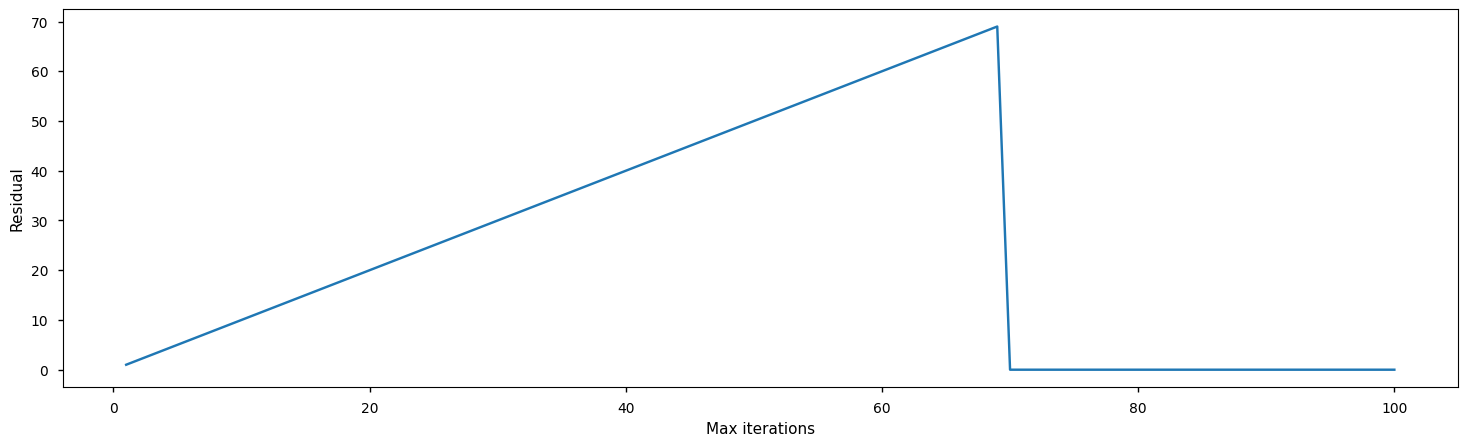

In [32]:
fig, ax = plt.subplots(1,figsize=(18, 5),dpi=100)

ax.plot(iters, res)
ax.set_xlabel("Max iterations")
ax.set_ylabel("Residual");

## SPAI preconditioning
The SPAI preconditioner is defined by

$$
\begin{align*}
\mathrm{C}_k &= \mathrm{A} \mathrm{M}_k\\
\mathrm{G}_k &= \mathrm{I} - \mathrm{C}_k\\
\alpha_k &=\operatorname{tr}(\mathrm{G}_k^\text{T}\mathrm{A}\mathrm{G}_k) / \|\mathrm{A}\mathrm{G}_k\|_\text{F}^2\\
\mathrm{M}_{k+1} &= \mathrm{M}_k + \alpha_k \mathrm{G}_k
\end{align*}
$$

Implement this preconditioner. Solve $\mathrm{A}\mathbf{x}=\mathrm{b}$ using $\mathrm{M}_m$ as a preconditioner for a range of values of $m$ and make a plot showing
the number of iterations vs the size of the residual for each of these.
If $m$ is too large, the preconditioner will take a long time to compute; if $m$ is too small, $\mathrm{M}_m$ will not be a good preconditioner. Experiment to find a good value to use for $m$.

You may wish to use the code included in [the preconditioning section of the lecture notes](https://tbetcke.github.io/hpc_lecture_notes/it_solvers4.html)
as a template.